In [1]:
import keras
import numpy as np
from keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data()
print("  ",x_train[0])

e:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
e:\anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


   [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


   238.71364


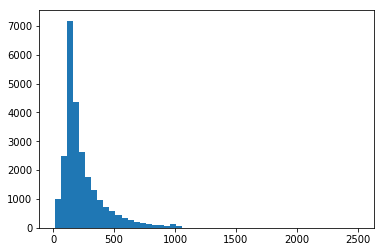

In [2]:
avg_len = list(map(len,x_train))
print("  ",np.mean(avg_len))
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(avg_len,bins=range(min(avg_len),max(avg_len)+50,50))
plt.show()

In [4]:
print("  ",x_train.shape,y_train.shape)
print("  ",x_test.shape,y_test.shape)

   (25000,) (25000,)
   (25000,) (25000,)


In [10]:
from keras.preprocessing import sequence #句子序列
from keras.models import Sequential #AI模型
from keras.layers import Dense,Embedding #控制层
from keras.layers import LSTM #RNN神经网络的一种
from keras.datasets import imdb

max_feature = 20000 #特征数量,最大的单词数量
max_length = 80 #最大长度
batch_size = 32 #批量大小
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_feature)
print(len(x_train),len(x_test))
x_train = sequence.pad_sequences(x_train,maxlen=max_length)
x_test = sequence.pad_sequences(x_test,maxlen=max_length)
print("  ",x_train.shape,x_test.shape) #形状

25000 25000
   (25000, 80) (25000, 80)


In [11]:
model = Sequential()
model.add(Embedding(max_feature,128)) #嵌入层
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2)) #内部LSTM循环神经网络
model.add(Dense(1,activation="sigmoid")) #输出结果
model.compile(loss="binary_crossentropy", #损失最小
              optimizer="adam", #优化
              metrics=["accuracy"]) #精确
print("  train------------------------------")
model.fit(x_train,y_train,
          batch_size=batch_size, #批处理个数
          epochs=5, #训练次数
          validation_data=(x_test,y_test)) #训练
score = model.evaluate(x_test,y_test,batch_size=batch_size)
print("  loss函数",score[0],"识别率",score[1])
print(model.predict(x_test[1])) #预测的范例

  train------------------------------
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 258s 10ms/step - loss: 0.4611 - acc: 0.7829 - val_loss: 0.3826 - val_acc: 0.8341
Epoch 2/5
25000/25000 [==============================] - 255s 10ms/step - loss: 0.2946 - acc: 0.8810 - val_loss: 0.3736 - val_acc: 0.8359
Epoch 3/5
25000/25000 [==============================] - 255s 10ms/step - loss: 0.2155 - acc: 0.9148 - val_loss: 0.4062 - val_acc: 0.8325
Epoch 4/5
25000/25000 [==============================] - 251s 10ms/step - loss: 0.1493 - acc: 0.9435 - val_loss: 0.4719 - val_acc: 0.8253
Epoch 5/5
25000/25000 [==============================] - 35s 1ms/step
  loss函数 0.5456564018583298 识别率 0.82484
[[0.9617003 ]
 [0.16165401]
 [0.07356799]
 [0.49749687]
 [0.49749687]
 [0.53687376]
 [0.87918085]
 [0.09023346]
 [0.2101786 ]
 [0.3688176 ]
 [0.47591797]
 [0.57870686]
 [0.55213165]
 [0.5955756 ]
 [0.5459131 ]
 [0.5904159 ]
 [0.5560526 ]
 [0.8403253 